<a href="https://colab.research.google.com/github/alisherr003/California-houses-price/blob/main/California_houses%2C_transformerlargacha_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [31]:
URL= "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df=pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
df.shape

(20640, 10)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
housing_cat = df[["ocean_proximity"]]
encoder = OneHotEncoder()
df1 = encoder.fit_transform(housing_cat)
df1.toarray()
df1 = pd.get_dummies(df['ocean_proximity'])
df1=df1.astype(float)
df = pd.concat([df, df1], axis=1)
df = df.drop(['ocean_proximity'], axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  float64
 10  INLAND              20640 non-null  float64
 11  ISLAND              20640 non-null  float64
 12  NEAR BAY            20640 non-null  float64
 13  NEAR OCEAN          20640 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB


In [36]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
<1H OCEAN,0


In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
x = imputer.fit_transform(df)
df = pd.DataFrame(x, columns=df.columns, index=df.index)

In [38]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
<1H OCEAN,0


In [39]:
# Description of data
print(df.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

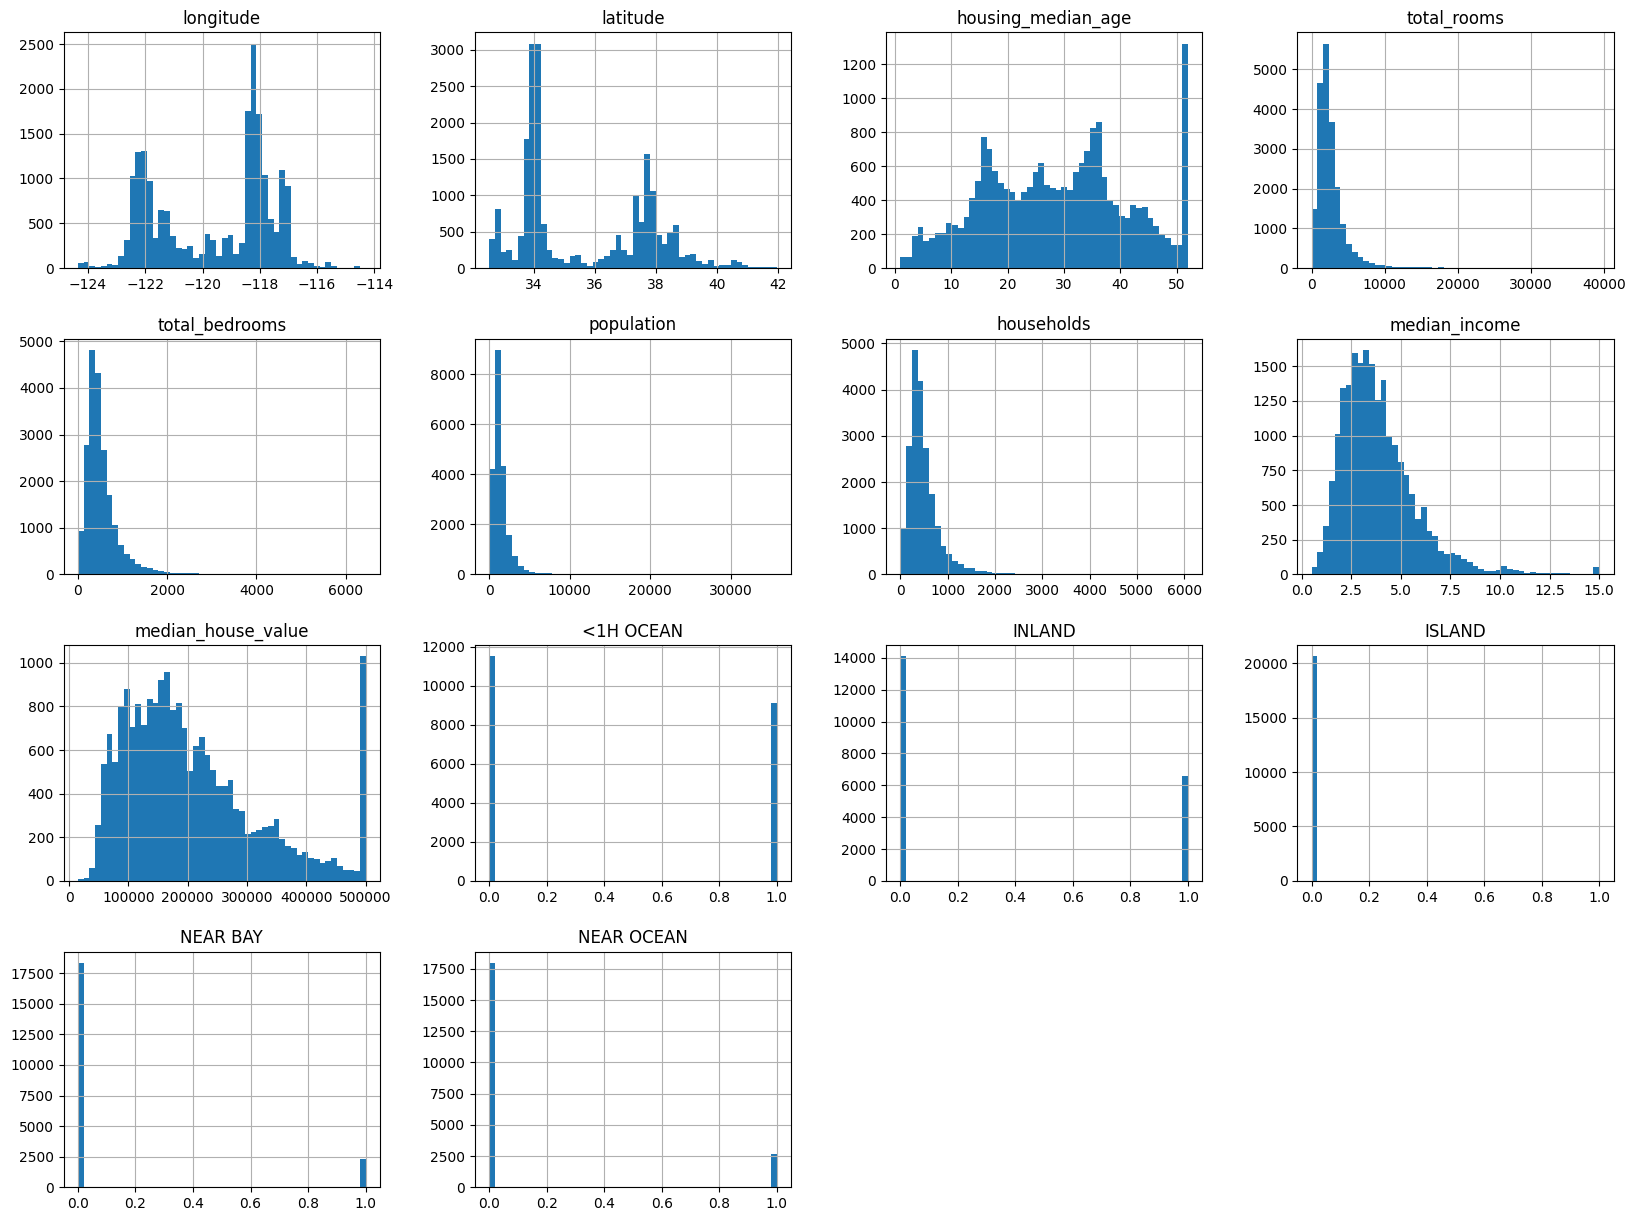

In [40]:
#Histograms
df.hist(bins=50, figsize=(20,15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

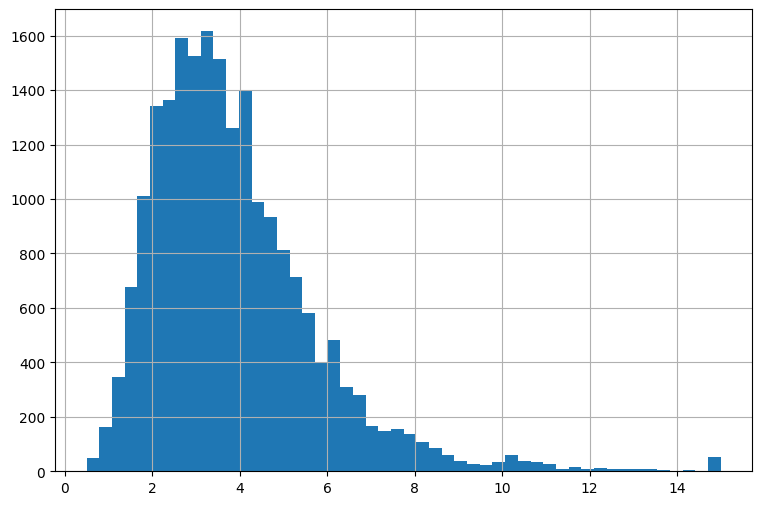

In [41]:
# Visualization of Median Income

df['median_income'].hist(bins=50,figsize=(9,6))
plt.show

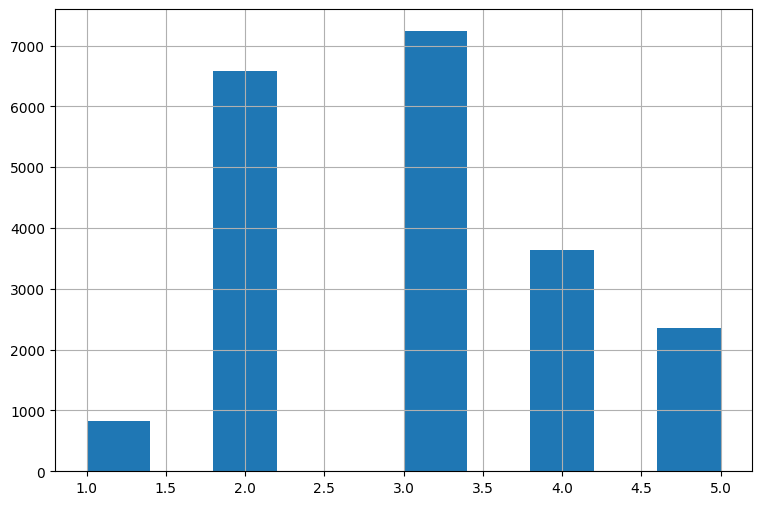

In [42]:
#Visualization of Median Income in Categories
df['income_cat'] = pd.cut(df['median_income'], bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

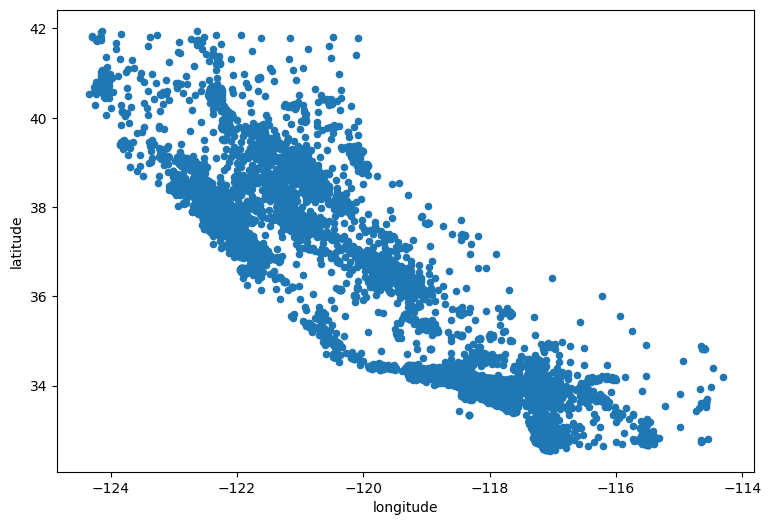

In [43]:
#Scatter plot
df.plot(kind="scatter", x="longitude", y="latitude", figsize=(9,6))
plt.show()

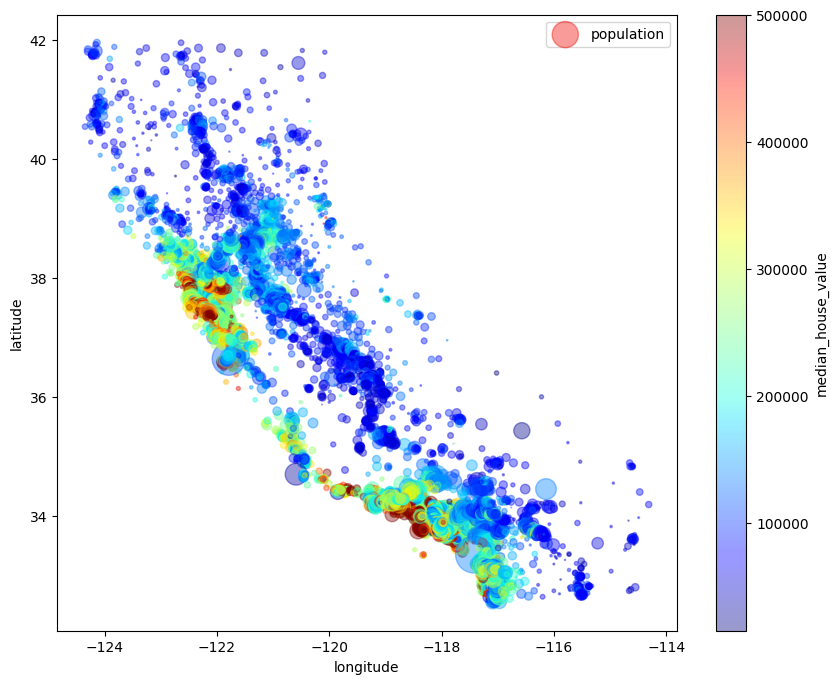

In [44]:

df.plot(kind='scatter', x='longitude',y='latitude',alpha=0.4, s=df['population']/50, #the size of dot will be changed according to population
             label='population',
             c='median_house_value', # the color of dot will be changed according to price of house
             cmap='jet', # colors: blue - low salary, red - high salary
             colorbar=True,
             figsize=(10,8)
             )
plt.show()

<Axes: >

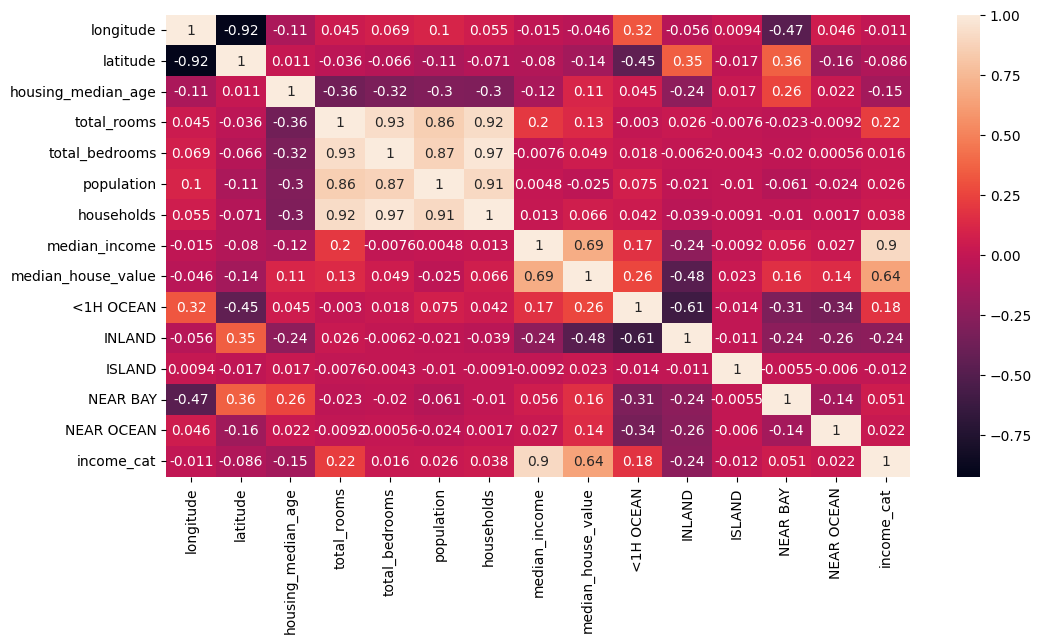

In [45]:
# Correlation

correlation=df.corr()
plt.subplots(figsize=(12,6))
sns.heatmap(correlation,annot=True)

In [46]:
#Corrwith
correl=df.corr()
median_house_value_corr=abs(correl['median_house_value']).sort_values()
print(median_house_value_corr)

ISLAND                0.023416
population            0.024650
longitude             0.045967
total_bedrooms        0.049457
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
NEAR OCEAN            0.141862
latitude              0.144160
NEAR BAY              0.160284
<1H OCEAN             0.256617
INLAND                0.484859
income_cat            0.643892
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64


In [47]:
# Separating the values into x and y
x=df.drop('median_house_value', axis=1)
y=df['median_house_value'].copy()

In [48]:
# Train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [49]:
models = {
        "KNeighborsRegressor": KNeighborsRegressor(),
        "LinearRegression": LinearRegression(),
        "DecisionTreeRegressor": DecisionTreeRegressor(),
        "LGBMRegressor": LGBMRegressor(n_estimators=1000)
    }

In [50]:
print("Models accuracy:")
for key, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"{key}: {round(r2_score(y_test,y_pred)*100)}%")

Models accuracy:
KNeighborsRegressor: 23%
LinearRegression: 63%
DecisionTreeRegressor: 63%
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 13
[LightGBM] [Info] Start training from score 207194.693738
LGBMRegressor: 84%


In [56]:
# Lets to try our models with other data

X = df[['median_income', 'INLAND','<1H OCEAN', 'NEAR BAY', 'latitude','NEAR OCEAN', 'total_rooms', 'housing_median_age', 'households']]
y = df['median_house_value']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)
model = LGBMRegressor(n_estimators=1000)
model.fit(x_train,y_train)
df1 = {'median_income':3.8462, 'INLAND': 0.0, '1H OCEAN': 0.0, 'NEAR BAY':1.0,'latitude':37.85,'NEAR OCEAN': 0.0,'total_rooms':280.0,'housing_medina_age':52.0, 'households':259.0 }

test=pd.DataFrame(df1,index = [1])
test


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1081
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 9
[LightGBM] [Info] Start training from score 206697.824188


,median_income,INLAND,1H OCEAN,NEAR BAY,latitude,NEAR OCEAN,total_rooms,housing_medina_age,households
1,3.8462,0.0,0.0,1.0,37.85,0.0,280.0,52.0,259.0


In [59]:

price = int(model.predict(test))
print(f"The price of new house is: {price}$ ")


The price of new house is: 336203$ 


<ipython-input-59-c816558f8bea>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price = int(model.predict(test))
